# Demo: Single Curvelet (Interactive)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from curvelops import FDCT2D

from ipywidgets import interactive_output, IntSlider, VBox, HBox

### Setup

In [2]:
nx = 300
nz = 350

# Create operator
DCT = FDCT2D((nx, nz), nbangles_coarse=8)

# Create empty structure for curvelet
y_struct = DCT.struct(np.zeros(DCT.shape[0]))

### Plotting

In [3]:
def display_curvelet(scale=1, wedge=1, ix=1, iy=1):
    s = scale - 1
    w = wedge - 1
    
    # Populate curvelet
    y_new = DCT.struct(np.zeros(DCT.shape[0]))
    A, B = y_new[s][w].shape
    iy = max(1, min(iy, A))
    ix = max(1, min(ix, B))
    y_new[s][w][iy-1, ix-1] = 1.
    
    x = DCT.H * DCT.vect(y_new)
    x = x.reshape((nx, nz))
    
    x_fk = np.fft.fft2(x)
    x_fk = np.fft.fftshift(x_fk)
    
    vmin, vmax = 0.8 * np.array([-1,1]) * np.abs(np.max(x))
    fig, ax = plt.subplots(2,2, figsize=(8,8), sharex='row', sharey='row')
    ax[0, 0].imshow(np.real(x.T), cmap='gray', vmin=vmin, vmax=vmax)
    ax[0, 1].imshow(np.imag(x.T), cmap='gray', vmin=vmin, vmax=vmax)
    ax[1, 0].imshow(np.abs(x_fk.T), cmap='gray', vmin=0)
    ax[1, 1].imshow(np.abs(x_fk.T) * np.angle(x_fk.T, deg=True), cmap='gray', vmin=-180, vmax=180)
    ax[0, 0].set(title='Space domain (Real)')
    ax[0, 1].set(title='Space domain (Imag)')
    ax[1, 0].set(title='Frequency domain (Abs)')
    ax[1, 1].set(title='Frequency domain (Abs * Phase)')
    ax[0,0].axvline(nx/2, color='y', alpha=0.5)
    ax[0,0].axhline(nz/2, color='y', alpha=0.5)
    ax[0,1].axvline(nx/2, color='y', alpha=0.5)
    ax[0,1].axhline(nz/2, color='y', alpha=0.5)    
    fig.tight_layout()

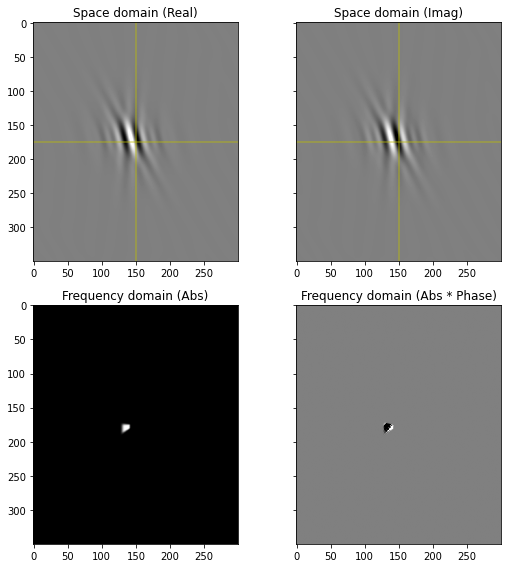

In [4]:
display_curvelet(scale=3, wedge=3, ix=y_struct[2][2].shape[1]//2+1, iy=y_struct[2][2].shape[0]//2+1)

### Interactive

In [5]:
max_scale = DCT.nbscales
max_wedge = len(y_struct[0])
max_iy, max_ix =  y_struct[0][0].shape
curr_scale = 1
curr_wedge = 1

slider_scale = IntSlider(min=1, max=max_scale, value=curr_scale, step=1,description='Scales')
slider_wedge = IntSlider(min=1, max=max_wedge, value=curr_wedge, step=1, description='Wedge')
slider_ix = IntSlider(min=1, max=max_ix, value=max_ix//2 + 1, step=1, description='X Index')
slider_iy = IntSlider(min=1, max=max_iy, value=max_iy//2 + 1, step=1, description='Y Index')

def handle_scale_change(change):
    global curr_scale
    curr_scale = change.new
    slider_wedge.max = len(y_struct[curr_scale-1])
    global curr_wedge
    curr_wedge = slider_wedge.value
    A, B = y_struct[curr_scale-1][curr_wedge-1].shape
    slider_ix.max = B
    slider_iy.max = A

def handle_wedge_change(change):
    global curr_wedge
    curr_wedge = change.new
    A, B = y_struct[curr_scale-1][curr_wedge-1].shape
    slider_ix.max = B
    slider_iy.max = A

slider_scale.observe(handle_scale_change, names='value')
slider_wedge.observe(handle_wedge_change, names='value')

out = interactive_output(display_curvelet,
                         {"scale": slider_scale, "wedge": slider_wedge, "ix":  slider_ix,  "iy":  slider_iy})
vbox1 = VBox([slider_scale, slider_wedge])
vbox2 = VBox([slider_ix, slider_iy])
ui = HBox([vbox1, vbox2])
display(ui, out, continuous_update=False)

Output()